In [ ]:
!pip install pandas scikit-learn nltk 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import time


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

In [3]:
file_path = 'News_Category_Dataset_v3.json'
df2 = pd.read_json("News_Category_Dataset_v3.json", lines=True)
df2['text'] = df2['headline'] + " " + df2['short_description']
df2 = df2[['category', 'text']]

In [5]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

df2['processed_text'] = df2['text'].apply(preprocess_text)

Confusion Matrix:
 [[ 13   0   3 ...   3   0   0]
 [  2   1   5 ...   8   0   0]
 [  0   0 183 ...   2   0   0]
 ...
 [  0   0   3 ... 168   0   0]
 [  0   0   2 ...   2 215   7]
 [  1   0   1 ...   1  42  49]]


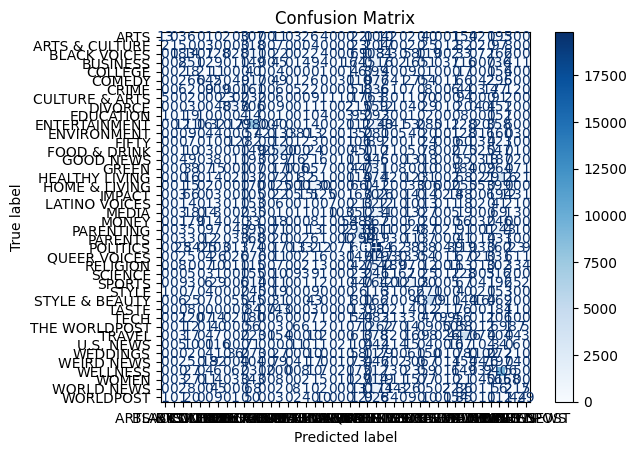

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df2['processed_text'], df2['category'], test_size=0.6)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', MultinomialNB()),
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, cmap='Blues', display_labels=pipeline.classes_)

plt.title('Confusion Matrix')
plt.show()

In [7]:
print("Training the model...")
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

print("Making predictions...")
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Training the model...
Training completed in 2.38 seconds (0.04 minutes)
Making predictions...
Accuracy: 0.4929

Classification Report:
                precision    recall  f1-score   support

          ARTS       0.57      0.01      0.03       893
ARTS & CULTURE       1.00      0.00      0.00       804
  BLACK VOICES       0.60      0.07      0.12      2751
      BUSINESS       0.50      0.23      0.32      3628
       COLLEGE       0.67      0.00      0.01       716
        COMEDY       0.66      0.20      0.31      3191
         CRIME       0.55      0.42      0.48      2149
CULTURE & ARTS       0.92      0.04      0.07       627
       DIVORCE       0.89      0.40      0.55      2099
     EDUCATION       0.80      0.01      0.01       603
 ENTERTAINMENT       0.44      0.76      0.56     10504
   ENVIRONMENT       1.00      0.05      0.10       827
         FIFTY       1.00      0.00      0.00       831
  FOOD & DRINK       0.57      0.67      0.61      3773
     GOOD NEWS       1.0